In [1]:
%matplotlib notebook

# Bike Trippin

For this assignment, you will be taking "Cycle Share" data from Seattle and creating charts to determine which gender borrows and uses bikes more often.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Check for null or NaN values and remove them
* Split up your data into groups based upon the gender column
    * NOTE: There will be a garbage row with a gender of 'stoptime' which you will have to remove!
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
# Import our data into pandas from CSV
trip_data = pd.read_csv("Resources/trip.csv")
trip_data

trip_data.head()

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [10]:
# Get the last 5 rows 
trip_data.tail()

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
286853,8/31/2016 23:45,SEA00201,679.532,Harvard Ave & E Pine St,2nd Ave & Spring St,CH-09,CBD-06,Short-Term Pass Holder,NaN,NaN
286854,9/1/2016 0:20,SEA00247,1965.418,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286855,9/1/2016 0:20,SEA00300,1951.173,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286856,9/1/2016 0:20,SEA00047,1883.299,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286857,9/1/2016 0:20,SEA00442,1896.031,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN


In [15]:
# Check for null or NaNs.
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   stoptime           286858 non-null  object 
 1   bikeid             286858 non-null  object 
 2   tripduration       286858 non-null  float64
 3   from_station_name  286858 non-null  object 
 4   to_station_name    286858 non-null  object 
 5   from_station_id    286858 non-null  object 
 6   to_station_id      286858 non-null  object 
 7   usertype           286858 non-null  object 
 8   gender             181558 non-null  object 
 9   birthyear          181554 non-null  object 
dtypes: float64(1), object(9)
memory usage: 21.9+ MB


In [18]:
# Create a clean DataFrame after dropping the null values.
clean_trip_data = trip_data.dropna()
clean_trip_data.head()

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [33]:
# Check for null values again.
clean_trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181554 entries, 0 to 286849
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   stoptime           181554 non-null  object 
 1   bikeid             181554 non-null  object 
 2   tripduration       181554 non-null  float64
 3   from_station_name  181554 non-null  object 
 4   to_station_name    181554 non-null  object 
 5   from_station_id    181554 non-null  object 
 6   to_station_id      181554 non-null  object 
 7   usertype           181554 non-null  object 
 8   gender             181554 non-null  object 
 9   birthyear          181554 non-null  object 
dtypes: float64(1), object(9)
memory usage: 15.2+ MB


In [34]:
# Split up our data into groups based upon 'gender'
gender_trip_data = clean_trip_data.groupby("gender")

# Find out how many of each gender took bike trips
gender_trips = gender_trip_data['tripduration'].count()
gender_trips

gender
Female       37558
Male        140564
Other         3431
stoptime         1
Name: tripduration, dtype: int64

<IPython.core.display.Javascript object>


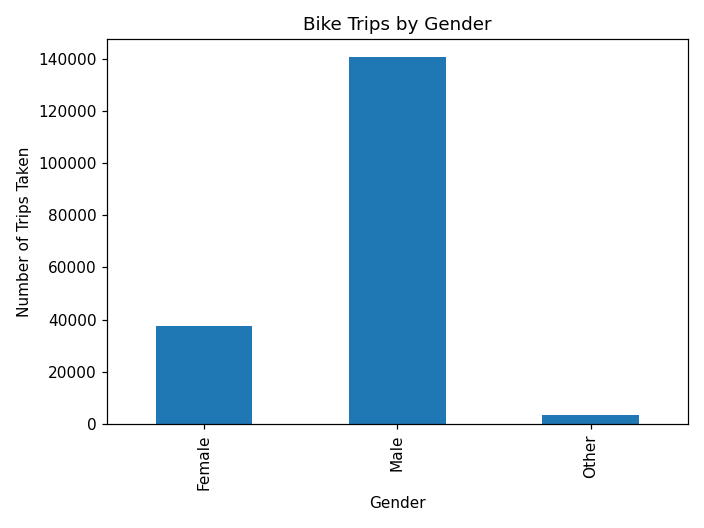

In [35]:
# Drop the 'stoptime' row that is contained within our group
gender_trips = gender_trips.drop(gender_trips.index[3])
# Chart our data, give it a title, and label the axes
gender_chart = gender_trips.plot(kind="bar", title="Bike Trips by Gender")
gender_chart.set_xlabel("Gender")
gender_chart.set_ylabel("Number of Trips Taken")

plt.show()
plt.tight_layout()

# Bonus!

You will now take the same base data frame before and create some code that will allow you to create individual pie charts for each bike. For this part of the activity, we want you to chart the total 'Trip Duration' of each bike, sorted by gender. Bonus points if you can come up with a method to do this without using loc or iloc to filter the original data frame! You can use loc to filter group data though.

In [39]:
# Group our data based upon 'bikeid' and 'gender'
bike_groups = clean_trip_data.groupby(['bikeid','gender'])

# Create a new variable that holds the sum of our groups
sum_it_up = bike_groups.sum()
sum_it_up.head()

tripduration
bikeid   gender              
SEA00001 Female     15876.665
         Male       41150.373
         Other        276.880
SEA00005 Female     20616.240
         Male       60386.328

In [37]:
# Make a variable called bike_id and store a 'bikeid' in it


# Collect the trips of the 'bikeid' above


<IPython.core.display.Javascript object>


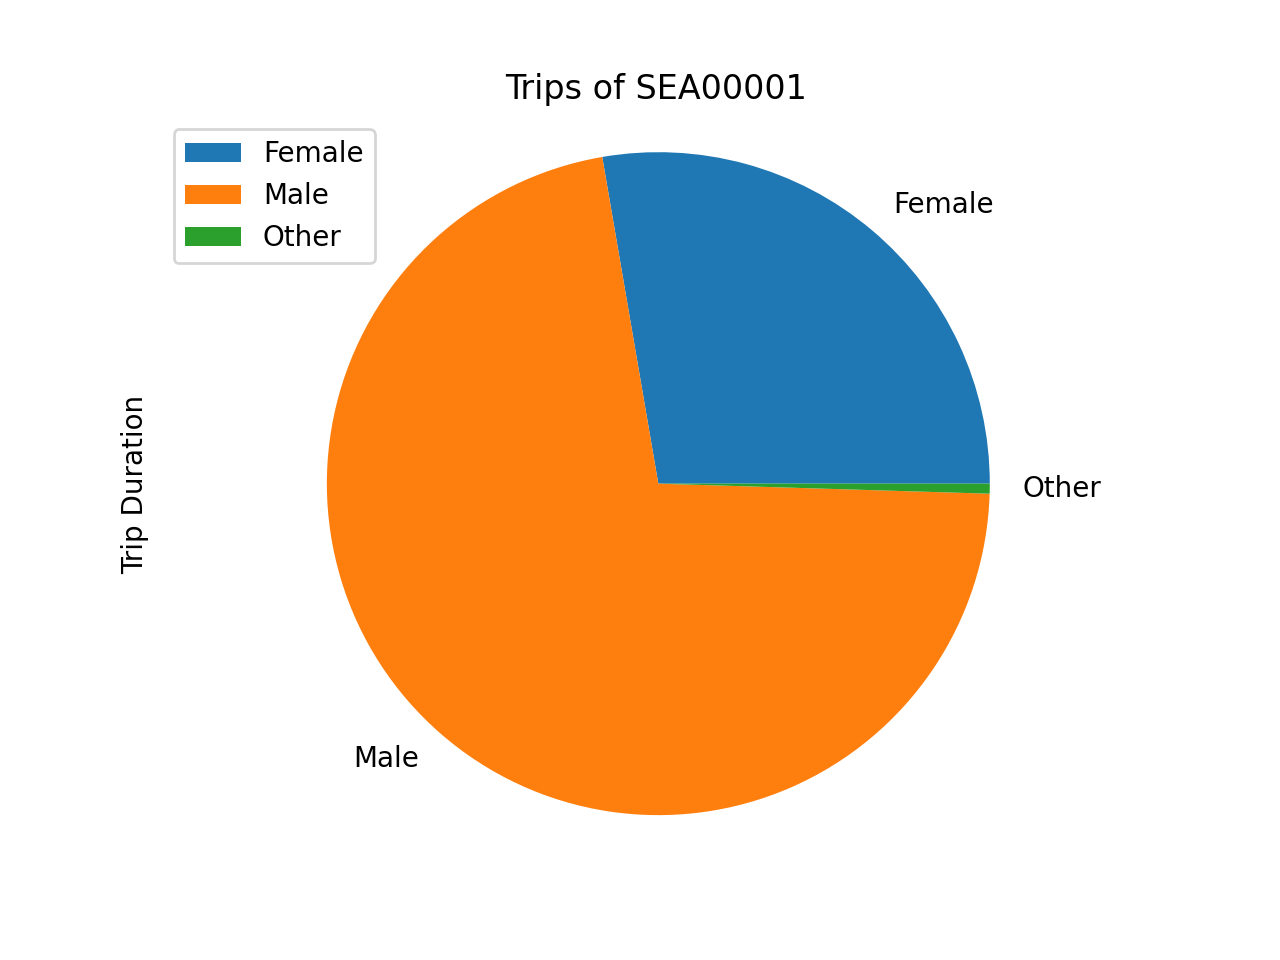

(-1.1147094275724616,
 1.1007004506069709,
 -1.1184745250918073,
 1.1115901234827354)

In [12]:
# Create a pie chart based upon the trip duration of that single bike
